In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gzip
import pickle as pkl
from pathlib import Path

import numpy as np
import tensorflow as tf
import preproc as pp
from matplotlib import pyplot as plt

seed = 53429857

2023-02-22 18:20:02.326180: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-22 18:20:03.482477: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /software/spackages_prod/apps/linux-ubuntu20.04-zen2/gcc-9.4.0/anaconda3-2021.05-5d7m6vbj62rh6onwyyz6mdqatpag2b3b/lib
2023-02-22 18:20:03.482539: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-22 18:20:28.124032: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Cou

In [3]:
train_ir, test_ir = pp.load_data(val_size=0)
# train_ds, test_ds = pp.load_ext_data()

2023-02-22 18:21:19.765856: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /software/spackages_prod/apps/linux-ubuntu20.04-zen2/gcc-9.4.0/anaconda3-2021.05-5d7m6vbj62rh6onwyyz6mdqatpag2b3b/lib
2023-02-22 18:21:19.765944: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-22 18:21:19.765980: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (erc-hpc-comp021): /proc/driver/nvidia/version does not exist
2023-02-22 18:21:19.766517: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other 

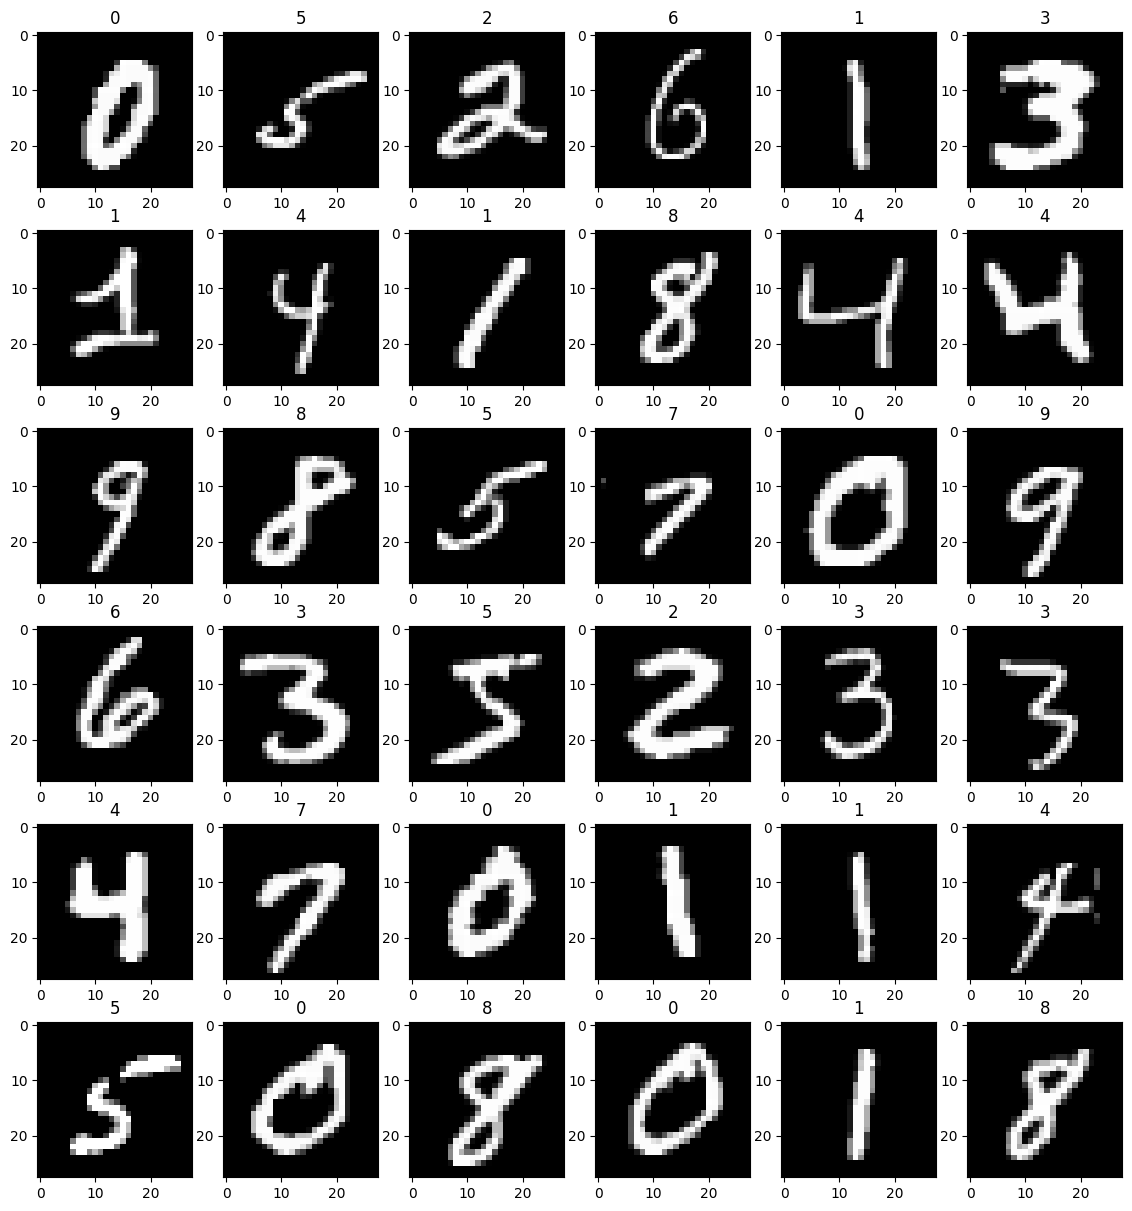

In [4]:
pp.plot_shuffle(train_ir)

# Augment

In [5]:
augp = Path("../scratch").joinpath("train_augmented")
if not augp.exists():
    augp.mkdir()

ds, lab = [], []
for i in range(10):
    aug_pipe = tf.keras.Sequential([
        tf.keras.layers.RandomHeight(0.05),
        tf.keras.layers.RandomWidth(0.05),
        tf.keras.layers.RandomRotation(0.1, fill_mode="nearest"),
        tf.keras.layers.RandomZoom(0.05, 0.05, fill_mode="nearest"),
        tf.keras.layers.RandomTranslation(0.1, 0.1, fill_mode="nearest"),
        tf.keras.layers.Resizing(28, 28, crop_to_aspect_ratio=False)
    ])
    train_aug = (
        train_ir
        .map(lambda x, y: (aug_pipe(x, training=True), y), num_parallel_calls=10, deterministic=False)
    )
    tf.data.experimental.save(train_aug, augp.joinpath(f"ds{i}").as_posix(), compression="GZIP")

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Instructions for updating:
Use `tf.data.Dataset.save(...)` instead.


In [5]:
augp = Path("../scratch").joinpath("test_augmented")
if not augp.exists():
    augp.mkdir()

augs = {
    "height": [tf.keras.layers.RandomHeight(0.1)],
    "width": [tf.keras.layers.RandomWidth(0.1)],
    "rot": [tf.keras.layers.RandomRotation(0.2, fill_mode="nearest")],
    "zoom": [tf.keras.layers.RandomZoom(0.1, 0.1, fill_mode="nearest")],
    "translation": [tf.keras.layers.RandomTranslation(0.2, 0.2, fill_mode="nearest")]
}
ds, lab = [], []
for k, a in augs.items():
    aug_pipe = tf.keras.Sequential(a + [tf.keras.layers.Resizing(28, 28, crop_to_aspect_ratio=False)])
    train_aug = (
        train_ir
        .map(lambda x, y: (aug_pipe(x, training=True), y), num_parallel_calls=10, deterministic=False)
    )
    tf.data.experimental.save(train_aug, augp.joinpath(f"ds_{k}").as_posix(), compression="GZIP")

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Instructions for updating:
Use `tf.data.Dataset.save(...)` instead.
